# Исследование успешности игр в интернет-магазине «Стримчик»

В нашем распоряжении данные по проданным играм до 2016 года. Доступные исторические данные -  продажи игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Также в наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План хода исследования:**
1. Изучение полученных данных
2. Проведение предобработки данных:
- приведение данных к соответствующему виду
- поиск и заполнение пропусков
- расчет суммарных продаж во всех регионах
3. Исследовательский анализ данных
- анализ количества выпущенных игр по годам
- анализ продаж на разных платформах
- оценка потенциально прибыльных платформ
- оценка по глобальным продажам игр в разбивке по платформам
- оценка влияния на продажи внутри одной популярной платформы отзывы пользователей и критиков
- оценка общих тенденций популярных жанров
4. Портрет пользователя каждого региона
- самые популярные платформы
- самые популярные жанры
- влияние рейтинга ESRB на продажи
5. Проверка гипотиз

**Цель исследования:** выявить определяющие успешность игры закономерности для дальнейшего прогноза потенциально популярный продукт и спланировать рекламные кампании.


## Изучение исходных данных.

In [1]:
import pandas as pd # импортирует библиотеку pandas
import matplotlib.pyplot as plt # импортирует библиотеку для построения графиков
import numpy as np # импортирует библиотеку для высоких математических вычислений
from scipy import stats as st # импортирует библиотеку для работы с гипотезами
import seaborn as sns

In [2]:
data = pd.read_csv('/content/games.csv') # прочитает csv-файл

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info() # общая информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В исходных данных представлена таблица в 16,7 тысяч строк. Как можно заметить, есть пропуски в столбцах оценка критиков, оценка пользователей и рейтинг от организации ESRB. Также для удобства дальнейшей работы неплохо обработать названия столбцов и привести оценки критиков и пользователей к одному формату.

## Предобработка данных.
### Данные.
Для начала приведем названия столбцов к строчному регистру для дальнейшего удобства обращения к данным.

In [5]:
data.columns = data.columns.str.lower()

Теперь приведем в порядок типы данных в столбцах. И так, изменим тип столбцов года выпуска, оценка критиков и оценка пользрователей. Приведем значения столбцов с оценкой к десятибальной шкале. В данном исследовании значения столбца год выпуска достаточно привести к целочисленному значению, так как в рамках данных у нас известен только год релиза.

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [7]:
data['critic_score'] = data['critic_score'].apply(lambda x: x/10)

In [8]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

К сожалению, изменить тип столбца с оценкой пользователей оказалось невозможно, по причине наличия странного значения **tbd**. Вернемся к типу данных, после того, как разберемся с данной оценкой.

Для начала найдём, с чем связана данная странная оценка.

In [10]:
data[data['user_score'] == 'tbd'].sort_values(by= 'na_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,7.3,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,6.1,tbd,E10+
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,7.1,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
15528,Littlest Pet Shop,PC,2008,Simulation,0.00,0.02,0.00,0.00,NaN,tbd,E
10912,Angry Birds: Rio,PC,2011,Puzzle,0.00,0.07,0.00,0.02,NaN,tbd,E
10812,Bejeweled Twist,DS,2010,Puzzle,0.00,0.08,0.00,0.01,7.7,tbd,E
13862,Valhalla Knights 2: Battle Stance,PSP,2009,Role-Playing,0.00,0.00,0.04,0.00,NaN,tbd,E10+


Согласно словарю, "tbd" - это to be determined( америк. англ.), т.е. "будет определено позднее". Следовательно, данная оценка является отсутствующей, заменим ее на пропуск.

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [12]:
data['user_score'] = data['user_score'].astype('float64')

In [13]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков.
Проверим где и сколько пропусков оказалось в данных

In [14]:
data.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64

В столбцах название, год выпуска и жанр количество пропусков менее 1,7% и больше похожи на случайные. Следовательно, удаление данных пропуков не повлияет на результаты исследования. А вот пропуски в столбцах оценка критиков(51%), оценка пользователей(55%) и возростной рейтинг(40%) могут значительно повлиять на конечный результат.

In [15]:
# Удалим строки с пропусками в столбцах название, платформа, год выпуска и жанр.
data = data.dropna(subset=['name','year_of_release', 'genre'])\
           .reset_index(drop=True) 

In [16]:
data.query('critic_score.isna() & user_score.isna() & rating.isna()') \
    .sort_values(by= 'na_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10548,Lord of Apocalypse,PSP,2011,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10550,Famicom Mini: Famicom Tantei Club Part II - Us...,GBA,2004,Adventure,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10552,Higurashi no Nakukoru ni Kizuna: Dai-Ni-Kan - Sou,DS,2008,Adventure,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10555,Fifi and the Flowertots,DS,2009,Misc,0.00,0.09,0.00,0.01,NaN,NaN,NaN


На основании данных из таблицы можно предположить, что игры с пропусками во всех тёх столбцах либо вышли до определенного года( далее выясним, какой это год) и статистистика оцнок по ним еще не велась, либо продажи игр не значительны для поиска бестселлеров.

Посмотрим, до какого года выпуска отсутствуют оценки.

In [17]:
data.groupby('year_of_release').agg({'user_score': 'count'})

,user_score
year_of_release,
1980,0
1981,0
1982,0
1983,0
1984,0
1985,1
1986,0
1987,0
1988,1


До 2000 года данные об оценках не носили массовый характер, так же за прошедшие 16 лет индустрия развлечений сильно шагнула вперед.

Теперь следует разобраться со вторым предположением.

In [18]:
data.query('critic_score.isna() & user_score.isna() & rating.isna()') \
    .sort_values(by= 'na_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10548,Lord of Apocalypse,PSP,2011,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10550,Famicom Mini: Famicom Tantei Club Part II - Us...,GBA,2004,Adventure,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10552,Higurashi no Nakukoru ni Kizuna: Dai-Ni-Kan - Sou,DS,2008,Adventure,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10555,Fifi and the Flowertots,DS,2009,Misc,0.00,0.09,0.00,0.01,NaN,NaN,NaN


Громкое заявление себя не оправдало. Да, среди оставшихся пропусков есть "не выстрелевшие" игры, но так же и игры, проданные миллионными тиражами. Последние не стоит опреметчиво выкидывать из исследования. Добавим в таблицу столбец с суммарными продажами для удобства дальнейшего анализа.

In [19]:
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] \
                        .sum(axis=1)

In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sum_sales        16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


In [22]:
data.sort_values(by= 'sum_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
15922,Uta no * Prince-Sama: Sweet Serenade,PSP,2011,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
15923,Higurashi no Naku Koro ni Iki,PS3,2015,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16443,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16405,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00


In [23]:
data.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.405984
sum_sales          0.000000
dtype: float64

И так, после всех манипуляций осталось 3,8% пропусков в оценках критиков и 0,1% пропусков в оценках пользователей. В целом, это допустимый процент для удаления, который не значительно повлияет на результаты исследования.

Заменим пропущенные значения в столбце возрастного рейтинга на "no rating" для дальнейшего исследования.

In [24]:
data['rating'] = data['rating'].fillna('no rating')

## Исследовательский анализ данных.
### Анализ количества выпущенных игр по годам
Для начала рассмотрим динамику выпуска игр по годам.

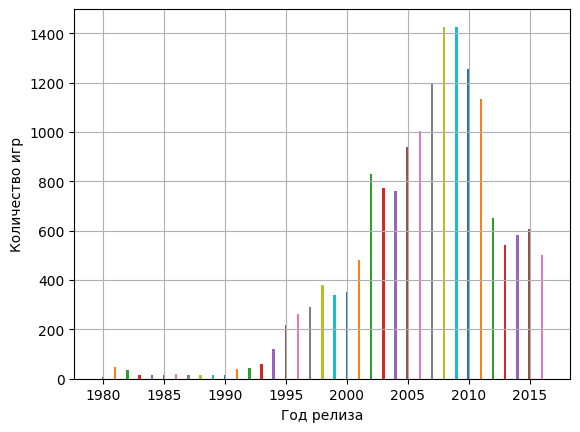

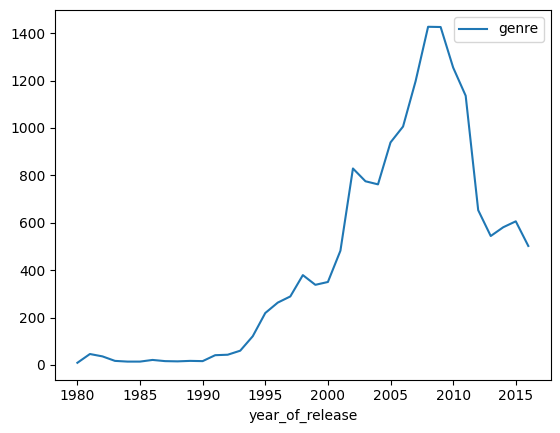

In [25]:
data.groupby('year_of_release')['year_of_release'].hist(bins=5)
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
data.pivot_table(index='year_of_release',
                 values='genre',
                 aggfunc='count') \
.round() \
.plot()
plt.show()

Пик количества релизов приходится на 2007 и 2008 годы. На графике наблюдаем возрастание количества выпускаемых игр ~~с 2000~~ до пика, затем наблюдается спад удачных выпусков игр.

### Анализ продаж на разных платформах.
Рассмотрим распределение продаж по платформам.

Text(0, 0.5, 'Чило продаж, млн.')

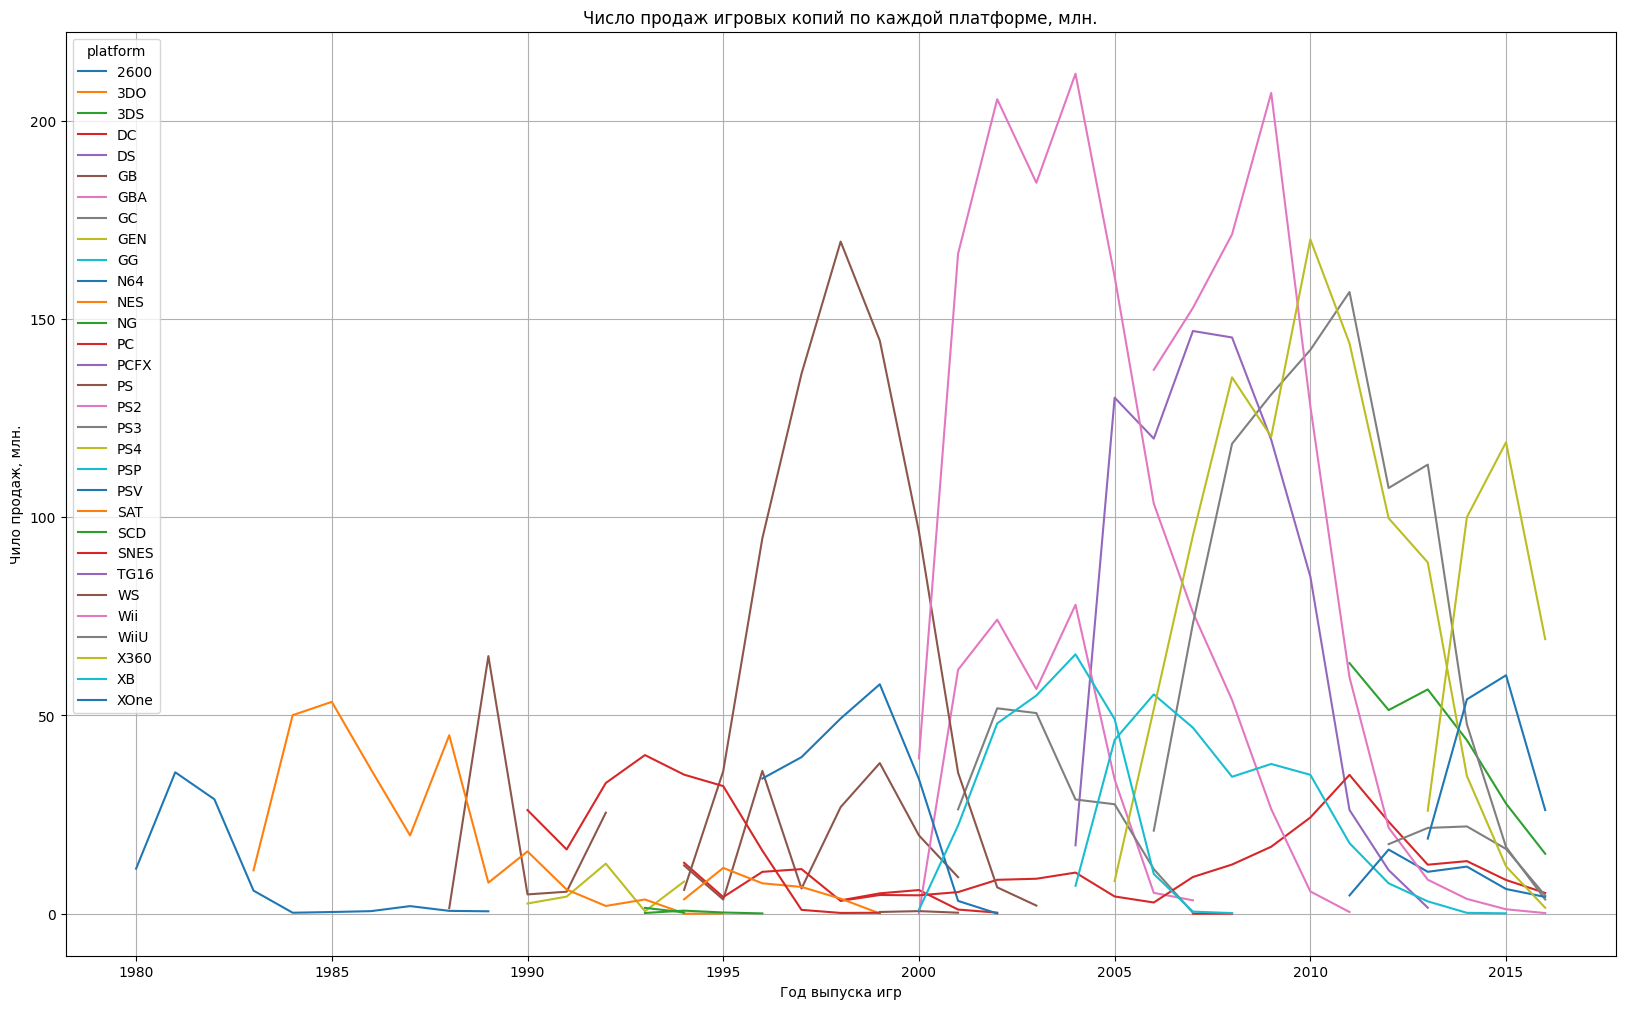

In [26]:
pd.pivot_table(
    data.query('platform in platform.unique()'),
    index='year_of_release',
    columns='platform',
    values='sum_sales',
    aggfunc='sum') \
.plot(title='Число продаж игровых копий по каждой платформе, млн.', figsize=( 20, 12), grid=True)
plt.xlabel('Год выпуска игр')
plt.ylabel('Чило продаж, млн.')

### Оценка потенциально прибыльных платформ.
Так как часть консолей уже практическт не актуальны в силу возраста, имеет смысл рассматривать данные за более поздние годы. Для исследования по актуальности платформ достаточно данных за период с 2014 года.

In [27]:
actual_data = data[data['year_of_release'] > 2013]

In [28]:
actual_data.groupby('platform') \
           .agg({'sum_sales': 'mean'}) \
           .sort_values(by= 'sum_sales', ascending=False)

,sum_sales
platform,
PS4,0.766356
XOne,0.615614
WiiU,0.588767
Wii,0.460909
X360,0.434414
3DS,0.408868
PS3,0.311324
PC,0.179139
PSV,0.075932


По полученным данным можно сделать следующий вывод - в последние 2 года есть 7 востребованных платформ с играми миллионниками.
По количеству игр миллионников можно составить следующий рейтинг:
1. Playstation PS4
2. Nintendo Wii U
3. Xbox One
4. Nintendo 3DS
5. ПК

Построим графики размаха по глобальным продажам для данных платформ.

Text(0, 0.5, 'Чило продаж, млн.')

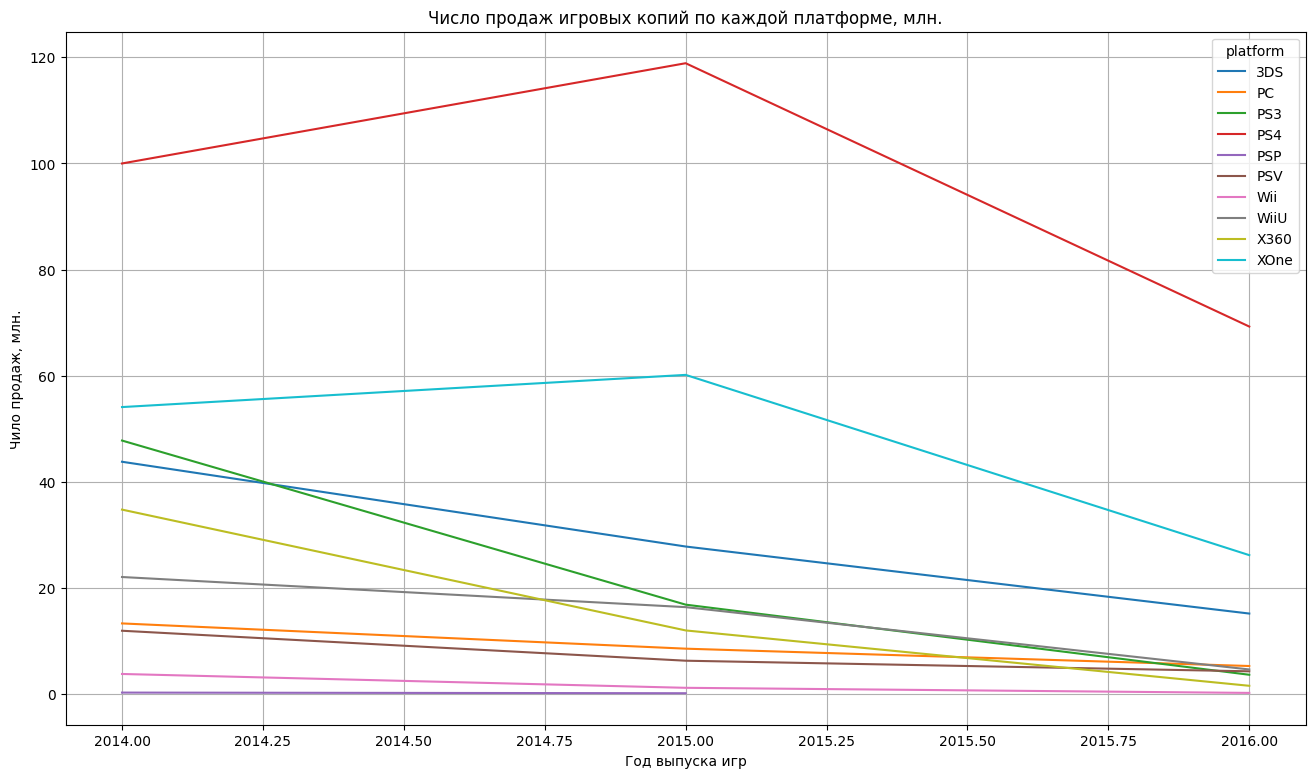

In [29]:
pd.pivot_table(
    actual_data.query('platform in platform.unique()'),
    index='year_of_release',
    columns='platform',
    values='sum_sales',
    aggfunc='sum') \
.plot(title='Число продаж игровых копий по каждой платформе, млн.', figsize=( 16, 9), grid=True)
plt.xlabel('Год выпуска игр')
plt.ylabel('Чило продаж, млн.')

По полученным данным можно сделать следующий вывод, что в выбранном периоде есть 3 особо успешные консоли - Playstation PS4, Xbox One и Nintendo 3DS. Также за этот период прекратили активность Nintendo Wii, PlayStation PSP и Xbox 360.

Построим графики размаха по глобальным продажам для данных платформ.

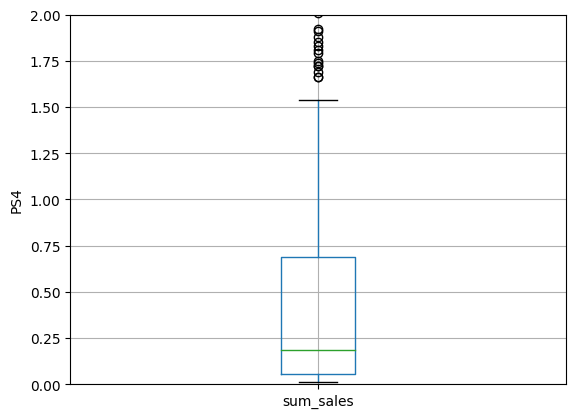

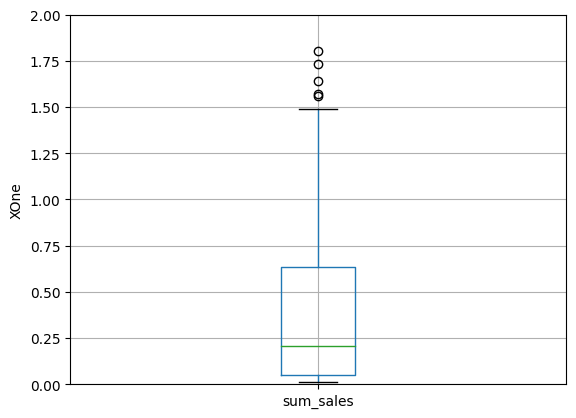

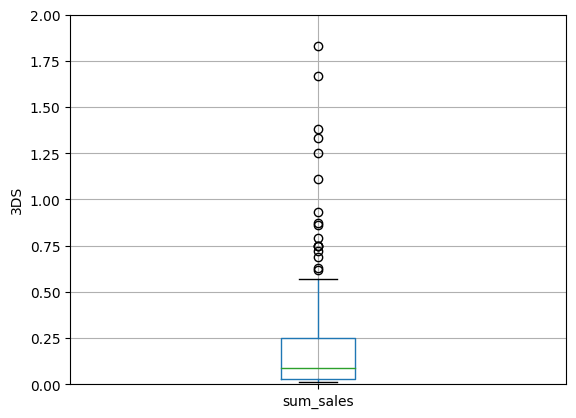

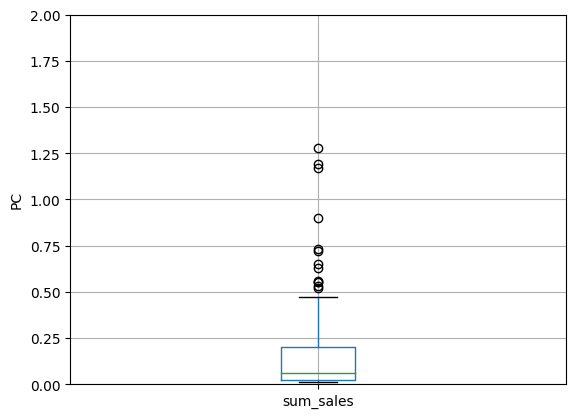

In [30]:
for platf in ['PS4','XOne', '3DS', 'PC']:
    actual_data[actual_data['platform'] == platf].boxplot(column='sum_sales')
    plt.ylabel(platf)
    plt.ylim(0, 2)
    plt.show() 

По графикам "ящика с усами" видно, что самый большой разброс значений на платформах Playstation PS4, остальные платформы имеют более стабильные значения. В данном случае выбросы говорят нам о наличии сверхуспешных игр, а не об ошибках в данных. Основная масса игр на всех алатформах имеет продажи от 1 до 3 милионов копий, что говорит об общем спаде индустрии.

### Оценка влияния на продажи внутри одной популярной платформы

На примере выделенной ранее платформы Playstation PS4 рассмотрим влияние оценок пользователей и критиков на продажи. Для анализа выбрана данная платформа, так как на ней существует начительный разброс значений проданных копий различных игр.

array([[<Axes: xlabel='sum_sales', ylabel='sum_sales'>,
        <Axes: xlabel='critic_score', ylabel='sum_sales'>,
        <Axes: xlabel='user_score', ylabel='sum_sales'>],
       [<Axes: xlabel='sum_sales', ylabel='critic_score'>,
        <Axes: xlabel='critic_score', ylabel='critic_score'>,
        <Axes: xlabel='user_score', ylabel='critic_score'>],
       [<Axes: xlabel='sum_sales', ylabel='user_score'>,
        <Axes: xlabel='critic_score', ylabel='user_score'>,
        <Axes: xlabel='user_score', ylabel='user_score'>]], dtype=object)

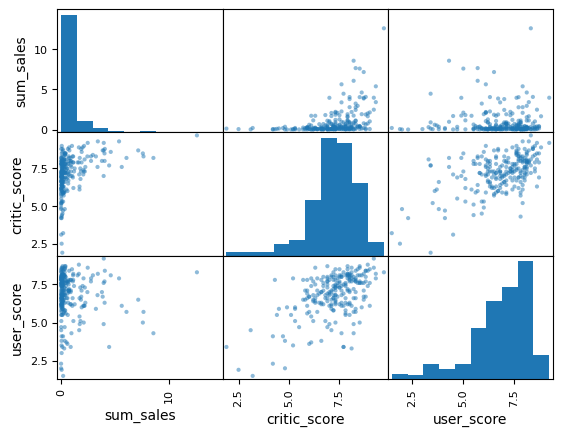

In [31]:
a_d = actual_data[actual_data['platform'] == 'PS4']
pd.plotting.scatter_matrix(
    a_d[['sum_sales',
         'critic_score', 
         'user_score']])

In [32]:
a_d[['sum_sales',
    'critic_score', 
    'user_score']].corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


По графику и результатам вычисления корреляции можно заметить, что положительно на суммарные продажи влияют оценки критиков. А вот ожидаемого влияниния оценки пользователей в общей массе меньше. Следует заметить, что все игры в выборке были успешными и оценок пользователей ниже 5 практически нет. Хочется также отметить, что оценки критиков влияют на оценки пользователей, что нельзя игнорировать. 

Проверим, подтвердят ли данные наблюдения другие платформы.

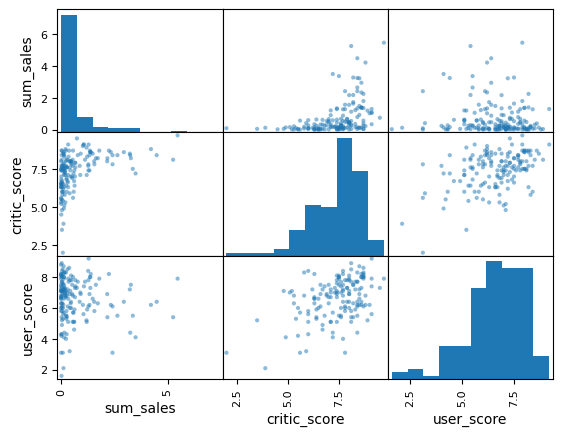

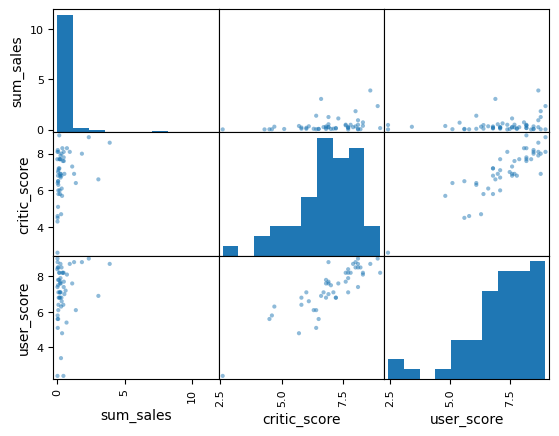

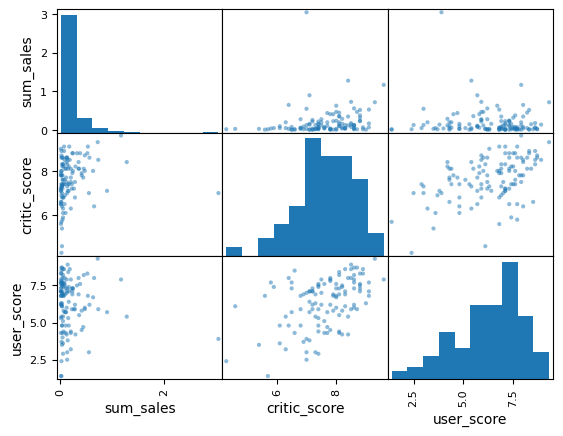

In [33]:
for platf in ['XOne', '3DS', 'PC']:
    pd.plotting.scatter_matrix(
    actual_data[actual_data['platform'] == platf] \
        [['sum_sales',
         'critic_score', 
         'user_score']])

In [34]:
for platf in ['XOne', '3DS', 'PC']:
    print(platf)
    print(
    actual_data[actual_data['platform'] == platf] \
        [['sum_sales',
         'critic_score', 
         'user_score']].corr())
    print( )

XOne
              sum_sales  critic_score  user_score
sum_sales      1.000000      0.428677   -0.070384
critic_score   0.428677      1.000000    0.440977
user_score    -0.070384      0.440977    1.000000

3DS
              sum_sales  critic_score  user_score
sum_sales      1.000000      0.314117    0.215193
critic_score   0.314117      1.000000    0.862485
user_score     0.215193      0.862485    1.000000

PC
              sum_sales  critic_score  user_score
sum_sales      1.000000      0.174634   -0.071597
critic_score   0.174634      1.000000    0.466099
user_score    -0.071597      0.466099    1.000000



Для большинства платформ предыдущие выводы являются верными. Однако, разброс значений на разных платформ схож для платформ одного производителя.

### Оценка общих тенденций популярных жанров

Посмотрим, игры в каких жанрах чаще всего попадают в миллионники по продажам. Так как в целом не наблюдается сменяимости моды на жанры, можно рассматривать данные для достаточно широкий временной период. 

<Axes: ylabel='sum_sales'>

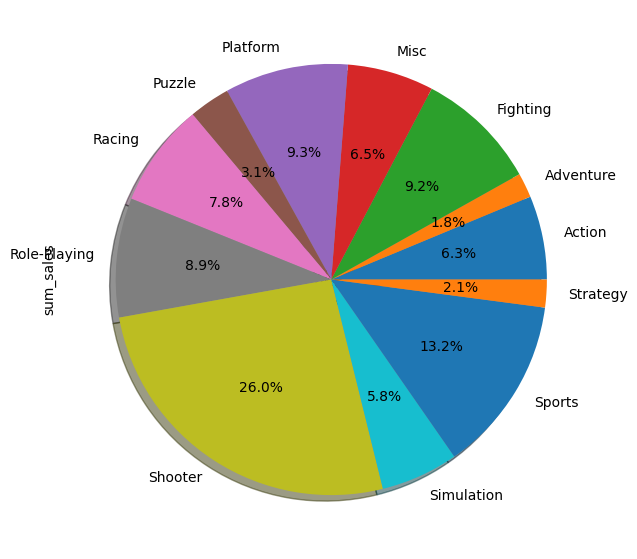

In [35]:
data_pie = actual_data.groupby('genre').agg({'sum_sales': 'mean'}) 
data_pie['sum_sales'].plot(kind='pie', figsize=(7,7),
                           autopct='%1.1f%%',
                           shadow=True)

На графике выше мы видем процентное разделение рынка игр по жанрам за период с 2014 года. Самый большой кусочек приходится на шутеры (26%), затем идут игры о спорте(13,2%), платформенные(9,3%), сражения(9,2%), ролевые(8,9%) и примерно 35% приходится на остальные популярные жанры игр. 

## Портрет пользователя каждого региона.

Как известно, у каждого рынка есть свои особенности. Проведем ииследование для каждого отдельного рынка. Для сравнения рассмотрим следующие параметры: самые популярные платформы, самые популярные жанры и влияние возростного рейтинга на популярность.

Для рассмотрения платформ, как и раньше, возьмем выборку за период с 2014 года.

### Рынок Северной Америки.



#### Самые популярные платформы.

In [36]:
actual_data.groupby('platform') \
           .agg({'na_sales': 'sum'}) \
           .sort_values(by= 'na_sales', ascending=False) \
           .head()

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


На рынке Северной Америки пользователи отдают предпочтение платформам в следующем рейтинге:
1. Playstation PS4
2. Xbox One
3. Xbox 360	
4. Nintendo 3DS
5. Playstation PS3

#### Самые популярные жанры.

In [37]:
actual_data.groupby('genre') \
           .agg({'na_sales': 'sum'}) \
           .sort_values(by= 'na_sales', ascending=False) \
           .head()

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


За последнее время на рынке Северной Америки популярны следующие жанры:
1. Шутеры
2. Экшен
3. Спортивные
4. Ролевые
5. Музыкальные

#### Влияние возростного рейтинга на популярность.

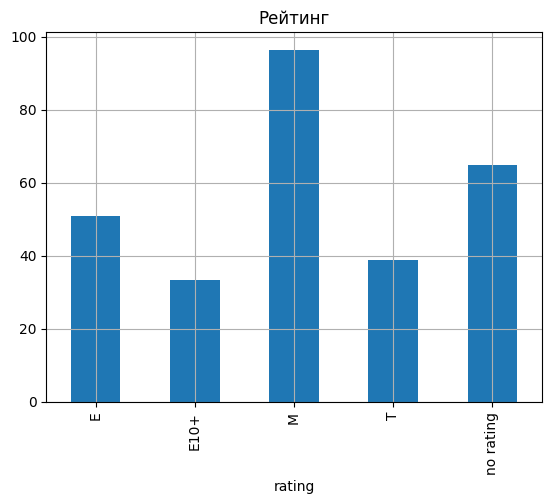

In [38]:
actual_data.groupby('rating')['na_sales'] \
           .sum() \
           .plot(x='rating',
                 y=[('sum','na_sales')],
                 title = 'Рейтинг',
                 kind='bar',
                 grid=True)
plt.show() 

Линейной зависимости между возрастным рейтингом и популярностью игры нет. Количество продаж в рейтинге 17+(M) значительно выше, чем в остальных категориях. Также есть большой процент игр с отсутствующим возростным рейтингом ESRB.

### Рынок Европы.



#### Самые популярные платформы.

In [39]:
actual_data.groupby('platform') \
           .agg({'eu_sales': 'sum'}) \
           .sort_values(by= 'eu_sales', ascending=False) \
           .head()

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


На рынке Европы пользователи отдают предпочтение платформам в следующем рейтинге:
1. Playstation PS4 
2. Xbox One
3. Playstation PS3
4. ПК 
5. Nintendo 3DS

#### Самые популярные жанры.

In [40]:
actual_data.groupby('genre') \
           .agg({'eu_sales': 'sum'}) \
           .sort_values(by= 'eu_sales', ascending=False) \
           .head()

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


За последнее время на рынке Европы популярны следующие жанры:
1. Экшен
2. Шутеры
3. Спортивные
4. Ролевые игры
5. Гонки

#### Влияние возростного рейтинга на популярность.

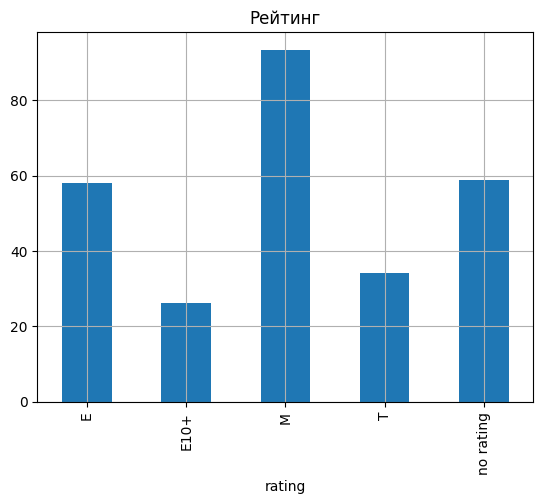

In [41]:
actual_data.groupby('rating')['eu_sales'] \
           .sum() \
           .plot(x='rating',
                 y=[('sum','eu_sales')],
                 title = 'Рейтинг',
                 kind='bar',
                 grid=True)
plt.show() 

Линейной зависимости между возрастным рейтингом и популярностью игры нет. В среднем количество продаж в рейтинге 17+(M) значительно выше, чем в остальных категориях. Также высокая популярность у игр для любого возраста(E) и у игр с неизвестным возрастным рейтингом ESRB.

### Рынок Японии.



#### Самые популярные платформы.

In [42]:
actual_data.groupby('platform') \
           .agg({'jp_sales': 'sum'}) \
           .sort_values(by= 'jp_sales', ascending=False) \
           .head()

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


На рынке Японии пользователи отдают предпочтение платформам в следующем рейтинге:
1. Nintendo 3DS
2. Playstation PS4
3. Playstation PSV
4. Playstation PS3
5. Nintendo Wii U

#### Самые популярные жанры.

In [43]:
actual_data.groupby('genre') \
           .agg({'jp_sales': 'sum'}) \
           .sort_values(by= 'jp_sales', ascending=False) \
           .head()

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


За последнее время на рынке Японии популярны следующие жанры:
1. Ролевые
2. Экшен
3. Схватки
4. Музыкальные
5. Шутеры

#### Влияние возростного рейтинга на популярность.

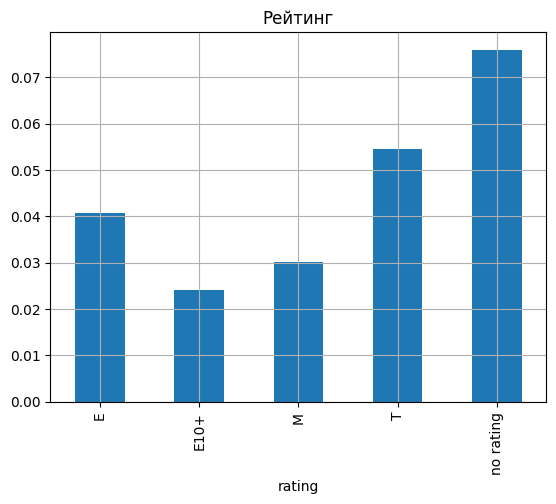

In [44]:
actual_data.groupby('rating')['jp_sales'] \
           .mean() \
           .plot(x='rating',
                 y=[('sum','jp_sales')],
                 title = 'Рейтинг',
                 kind='bar',
                 grid=True)
plt.show() 

Линейной зависимости между возрастным рейтингом и популярностью игры нет, таже в основном популярны игры не имеющие рейтинга ESRB. В меньшей мере пользователи предпочитают игры для подростков(Т) и для всех возрастов(Е). 

## Проверка гипотиз.

В общей статискике в пятерке востребованных платформ всего 3 стационарных. Для сравнения возьмем персоональные компьютеры и консоль Xbox One. Узнаем, равны ли средние значения оценок консоли Xbox One и персоонального компьютера(ПК).

```
H_0: Средняя оценка пользователей (user_score) палвтформы Xbox One = средняя оценка пользователей (user_score) ПК.
H_a: Средняя оценка пользователей (user_score) палвтформы Xbox One ≠ средняя оценка пользователей (user_score) ПК.
alpha = 0.05
```

In [45]:
stat_data = data[data['user_score'].notna()]
#вызов метода для проверки гипотезы
results = st.ttest_ind(
    stat_data[stat_data['platform'] =='XOne']['user_score'], 
    stat_data[stat_data['platform'] =='PC']['user_score'],
    equal_var=False)

alpha = 0.05 #задайте значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print("Есть основания отвергнуть нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

4.5385802963771835e-06
Есть основания отвергнуть нулевую гипотезу


Расчет показал, что нулевая гипотеза не подтвердилась, а значит значения равны.



Далее рассмотри два самых популярных жанра в мире - экшен-игры и спортивные. Проверим, отличаются ли средние оценки пользователей данных жанров.

```
H_0: Между средней оценкой пользователей (user_score) в жанре экшен и средней оценкой пользователей (user_score) в жанре спорт нет различий.
H_a: Между средней оценкой пользователей (user_score) в жанре экшен и средней оценкой пользователей (user_score) в жанре спорт есть различия.
alpha = 0.05
```

In [46]:
#вызов метода для проверки гипотезы
results = st.ttest_ind(
    stat_data[stat_data['genre'] =='Action']['user_score'], 
    stat_data[stat_data['genre'] =='Sports']['user_score'],
    equal_var=False)

alpha = 0.05 #задайте значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print("Есть основания отвергнуть нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


Расчет показал, что нулевая гипотеза не подвтвердилась, а значит значения не отличаются.

## Общий вывод.

Было проведено исследование продаж игр и платформ для них на основании данных по проданным играм до 2016 года. Доступные исторические данные -  продажи игр, оценки пользователей и экспертов, жанры, платформы и возростной рейтинг.

Цель исследования: 
- анализ количества выпущенных игр по годам
- анализ продаж на разных платформах
- оценка потенциально прибыльных платформ
- оценка влияния на продажи внутри одной популярной платформы отзывы пользователей и критиков
- оценка общих тенденций популярных жанров
- анализ пользователей каждого рынка (самые популярные платформы, самые популярные жанры,  влияние рейтинга ESRB на продажи)
- сравнение средних оценок пользователей для двух популярных платформ
- сравнение средних оценок пользователей для двух популярных жанров

**1. Анализ количества выпущенных игр по годам**

До 2007-2008 года наблюдался стремительны рост количества игр, после чего наблюдается тенденция спада интереса к играм. 

**2. Анализ продаж на разных платформах**

В данном разделе было установлено, что с 2000-го года количество разных платформ выросло, однако количество игр для каждой платформы снизилось. Также замечена сменяемость покалений платформ раз в 10 лет.

**3. Оценка потенциально прибыльных платформ**

Так как рынок видео-игр является быстроизменяющимся, была взята выборка данных за период с 2014 по 2016 год. Самыми популярными консолями за этот период стали Playstation PS4, Xbox One и Nintendo 3DS.

**4. Оценка влияния на продажи внутри одной популярной платформы отзывы пользователей и критиков**

На примере популярной консоли Playstation PS4 замечено, что оценка критиков имеет среднее положительное влияние на популярность игр, а вот оценки полизователей практически не влияют на ее популярность.

**5. Оценка общих тенденций популярных жанров**

В ощей статистике мы получили следующие значения - шутеры(26%), спорт(13,2%), платформенные(9,3%), схватки(9,2%), ролевые(8,9%) и примерно 35% приходится на остальные популярные жанры игр.

**6. Анализ пользователей каждого рынка**

Рынки Северной Америи и Европы в значительной степерни похожи. Пользователи обоих рынков в основном предпочитают платфрмы из списка: Playstation PS4 и PS3, Xbox One и Xbox 360, Nintendo 3DS и ПК. Также данные рынки имеют схожие интересы в жанрах (Шутеры, Экшен, Спортивные и Ролевые) и возрасных рейтингах игр( пользователи предпочитают игры с рейтингом 17+). В свою очередь рынок Японии отличается выбором консолей Nintendo и Playstation. В жанрах пользователи отдают свое предпочтение ролевым играм, экшен играм, схваткам, музыкальным и шутерам. Чаще всего япнци выбирают игры без возрастного рейтинга ESRB, игры для подростков и всех возрастов.

**7. Сравнение средних оценок пользователей для двух популярных платформ**

Была выдвинута гипотеза, что средние значения оценок консоли Xbox One и персоонального компьютера(ПК) равны. При расчете было доказано, что средние оценки пользователей данных платформ не равны.

**8. Савнение средних оценок пользователей для двух популярных жанров**

Также была выдвинута гипотеза, что средние оценки пользователей в самых популярных жанрах (экшен-игры и спортивные) не отличаются. Исследование показало, что средние оценки пользователей в популярных жанрах не отличаются. 

